<a href="https://colab.research.google.com/github/YounesseELH/Car-Price-Prediction-Web-App/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Processing

In [3]:
# Load Data
df = pd.read_csv('/content/car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#check missing values even in df.info() we can see that there no messing value but just a good attitude
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#Check categorical data
print("============")
print(df.Fuel_Type.value_counts())
print("============")
print(df.Seller_Type.value_counts())
print("============")
print(df.Transmission.value_counts())
print("============")


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Convert strings to numbers for categorical data

In [10]:
#convert Text to numbers because machines speak numbers 
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Split Data into Training data and Test data

In [17]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [18]:
X.head(3)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0


In [19]:
Y.head(3)

0    3.35
1    4.75
2    7.25
Name: Selling_Price, dtype: float64

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

# Model Training

*Linear Regression*

In [22]:
ln_model = LinearRegression()

In [23]:
ln_model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [28]:
train_pred = ln_model.predict(X_train)

In [29]:
err_score = metrics.r2_score(Y_train,train_pred)

In [30]:
print(err_score)

0.8799451660493711


# Visualize actual price and predicted price

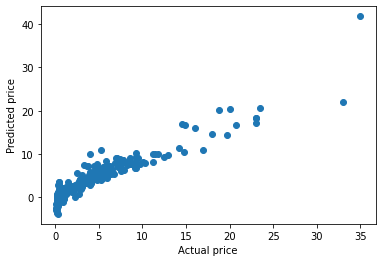

In [35]:
plt.scatter(Y_train,train_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [36]:
test_pred = ln_model.predict(X_test)

In [37]:
err_score = metrics.r2_score(Y_test,test_pred)

In [38]:
print(err_score)

0.8365766715027051


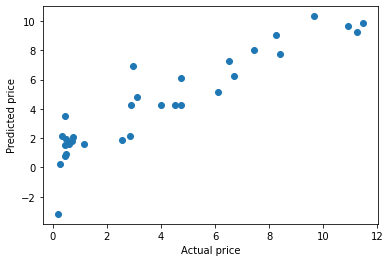

In [39]:
plt.scatter(Y_test,test_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

# Lasso regression

In [40]:
lasso_model = Lasso()

In [41]:
lasso_model.fit(X_train,Y_train)

Lasso()

In [42]:
train_pred = lasso_model.predict(X_train)

In [43]:
err_score = metrics.r2_score(Y_train,train_pred)

In [44]:
print(err_score)

0.8427856123435794


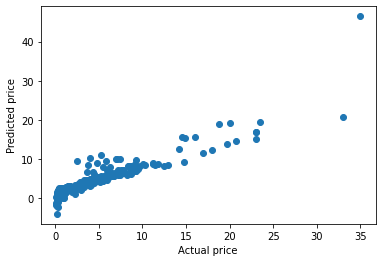

In [45]:
plt.scatter(Y_train,train_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

In [46]:
test_pred = lasso_model.predict(X_test)

In [47]:
err_score = metrics.r2_score(Y_test,test_pred)

In [48]:
print(err_score)

0.8709167941173195


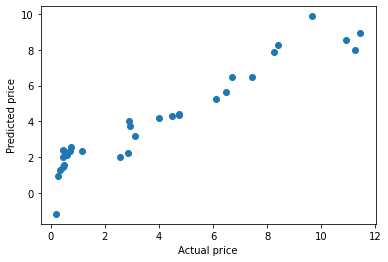

In [49]:
plt.scatter(Y_test,test_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()